# Project 4 : Réalisez une étude de santé publique avec R ou Python

## 2 Objectifs

### 1. Les questions de Marc entournant des information principales sur des donées de 2017
### 2. Les questions de Mélanie a besoin d'une étude un peu plus fine pour chacun des pays.

### Question 1 : La proportion de personnes en état de sous-nutrition 

In [1]:
#importation des pandas librairies
import pandas as pd
pd.set_option("display.max_columns",None)

In [2]:
#importation de fichier CSV

population = pd.read_csv('population.csv')
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")

population

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [3]:
#vérifier l'ensemble de données importées
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [4]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
population.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


In [6]:
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [7]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [8]:
#renommer les colonnes de deux data frames
sous_nutrition.rename(columns={"Valeur":"sous_nutrition"},inplace=True)
population.rename(columns={"Valeur":"population"},inplace=True)

In [9]:
#vérifier pour des valeurs manquantes
population[population["population"].isna()]


,Zone,Année,population


In [10]:
sous_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [11]:
sous_nutrition.dtypes

Zone              object
Année             object
sous_nutrition    object
dtype: object

In [12]:
sous_nutrition["sous_nutrition"]=pd.to_numeric(sous_nutrition["sous_nutrition"], errors='coerce')

In [13]:
sous_nutrition.fillna(0,inplace=True)
sous_nutrition.tail()

,Zone,Année,sous_nutrition
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0
1217,Zimbabwe,2017-2019,0.0


In [14]:
#Les données d'origine sont exprimées en millions d'habitants:
sous_nutrition["sous_nutrition"]*=1000000

In [15]:
#Vérifier les données au milieu de data frame population
population.iloc[1213:,:]

,Zone,Année,population
1213,Seychelles,2014,94.215
1214,Seychelles,2015,94.978
1215,Seychelles,2016,95.710
1216,Seychelles,2017,96.418
1217,Seychelles,2018,97.096
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [16]:
#Convertir NaN au 0
population["population"]=pd.to_numeric(population["population"], errors='coerce')
population.fillna(0,inplace=True)
#Multiplier par 1000 car la population est exprimée en milliers d'habitants
population["population"]*=1000

In [17]:
#Extraire la population 2017
population_2017= population.loc[population["Année"]==2017,["Zone","population"]]
population_2017

,Zone,population
4,Afghanistan,36296113.0
10,Afrique du Sud,57009756.0
16,Albanie,2884169.0
22,Algérie,41389189.0
28,Allemagne,82658409.0
...,...,...
1390,Venezuela (République bolivarienne du),29402484.0
1396,Viet Nam,94600648.0
1402,Yémen,27834819.0
1408,Zambie,16853599.0


In [18]:
#Dans sous_nutrition fichier, remplacer les périodes par les années
sous_nutrition["Année"]=sous_nutrition["Année"].replace(["2012-2014","2013-2015","2014-2016","2015-2017","2016-2018","2017-2019"],
                                             ["2013","2014","2015","2016","2017","2018"])
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [19]:
#Sélectionner l'année 2017
ss_nut_2017 = sous_nutrition.loc[sous_nutrition["Année"]=="2017", ["Zone","sous_nutrition"]]
ss_nut_2017

,Zone,sous_nutrition
4,Afghanistan,10500000.0
10,Afrique du Sud,3100000.0
16,Albanie,100000.0
22,Algérie,1300000.0
28,Allemagne,0.0
...,...,...
1192,Venezuela (République bolivarienne du),8000000.0
1198,Viet Nam,6500000.0
1204,Yémen,0.0
1210,Zambie,0.0


In [20]:
#Additioner le total de la population sous alimenté
total_ss_nut=round(ss_nut_2017["sous_nutrition"].sum(),)
total_ss_nut

535700000

In [21]:
#Fusionner le deux data frames
pop_sn=pd.merge(population_2017,ss_nut_2017, on="Zone", how="left")
pop_sn

,Zone,population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
231,Venezuela (République bolivarienne du),29402484.0,8000000.0
232,Viet Nam,94600648.0,6500000.0
233,Yémen,27834819.0,0.0
234,Zambie,16853599.0,0.0


In [22]:
#Calculer le total population in 2017
total_pop_2017=round(population_2017["population"].sum(),)
total_pop_2017

7548134111

In [23]:
#Calculer le total de personnes en état sous-nutrition en 2017
pers_sous_alimenté_2017 =round(ss_nut_2017["sous_nutrition"].sum(),)
pers_sous_alimenté_2017


535700000

In [24]:
#Calculer la proportion de personnes en état de sous-nutrition
prop_pers_sous_alimenté = round((pers_sous_alimenté_2017/total_pop_2017)*100,2)
prop_pers_sous_alimenté

7.1

In [25]:
#Afficher le résultat
print(f'En 2017, on comptait {prop_pers_sous_alimenté}% de la population était sous nutrition')

En 2017, on comptait 7.1% de la population était sous nutrition


In [26]:
#Changer le type de données
population["Année"]=population["Année"].astype(str)
sous_nutrition["Année"]=sous_nutrition["Année"].astype(str)

In [27]:
#Joindre le data frame de population (pop) et le data frame de sous_nutrition(sn)
df_popsn=pd.merge(population,sous_nutrition,on=['Zone','Année'],how = 'outer')
df_popsn

,Zone,Année,population,sous_nutrition
0,Afghanistan,2013,32269589.0,8600000.0
1,Afghanistan,2014,33370794.0,8800000.0
2,Afghanistan,2015,34413603.0,8900000.0
3,Afghanistan,2016,35383032.0,9700000.0
4,Afghanistan,2017,36296113.0,10500000.0
...,...,...,...,...
1411,Zimbabwe,2014,13586707.0,0.0
1412,Zimbabwe,2015,13814629.0,0.0
1413,Zimbabwe,2016,14030331.0,0.0
1414,Zimbabwe,2017,14236595.0,0.0


In [28]:
df_popsn.dtypes

Zone               object
Année              object
population        float64
sous_nutrition    float64
dtype: object

### Question 2 : Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale

In [29]:
#Vérifier la bonne importation de data frame aide alimentaire
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [30]:
aide_alimentaire.tail()

,Pays bénéficiaire,Année,Produit,Valeur
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306
1474,Zimbabwe,2013,"Riz, total",64


In [31]:
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [32]:
#Vérifier les types de données
dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [33]:
dispo_alimentaire.shape

(15605, 18)

In [34]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [35]:
#Remplacer NaN avec 0
dispo_alimentaire.fillna(0,inplace=True)

In [36]:
#Convertir les colonnes des tonnes aux Kg
colonnes_tonnes_tokg = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_tonnes_tokg:
    dispo_alimentaire[elt] *= 1000000

In [37]:
#Fusionner la disponibilité alimentaire avec la population 2017
dispo_aliment= dispo_alimentaire.merge(population.loc[population['Année'] == "2017",["Zone", "population"]],
                                            on='Zone')

In [38]:
dispo_aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [39]:
#Ctréer une colonne de total disponibilité alimentaire en 2017 pour chaque pays
dispo_aliment["dispo_Kcal"]=dispo_aliment["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_aliment["population"]*365

In [40]:
dispo_aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_Kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


In [41]:
#Calculer le total de disponibilité alimentaire en 2017
dispo_aliment["dispo_Kcal"].sum()

7635429388975815.0

In [42]:
#Calculer le total de disponibilité alimentaire par un adulte en 2017
total_dispo_Kcal=round(dispo_aliment["dispo_Kcal"].sum()/(2600*365),1)
#Calculer la proportion de disponibilité alimentaire en 2017
proportion=round (total_dispo_Kcal*100/population[population["Année"]=="2017"]["population"].sum(),1)
print(total_dispo_Kcal)
print(proportion)

8045763318.2
106.6


In [43]:
#Afficher le résultat
print(f'La disponibilité alimentaire total de 2017 pourrait nourrir {total_dispo_Kcal} de personnes soit 1.1 fois la population total')

La disponibilité alimentaire total de 2017 pourrait nourrir 8045763318.2 de personnes soit 1.1 fois la population total


### Question 3: Le nombre théorique de personnes qui pourraient être nourries pour la disponibilité alimentaire des produits végétaux 

In [44]:
#Vérifier les données de dispo alimentaire fusionnée
dispo_aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_Kcal
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10


In [45]:
#Créer une colonne pour le total disponibilité alimentaire pour chaque pays per jour(Kcal/population/jour)
dispo_aliment["dispo_Kcal_jour"]=dispo_aliment["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_aliment["population"]
dispo_aliment["dispo_Kcal_jour"]

0        181480565.0
1         36296113.0
2         36296113.0
3                0.0
4        145184452.0
            ...     
15411     28621755.0
15412      6996429.0
15413            0.0
15414            0.0
15415      2544156.0
Name: dispo_Kcal_jour, Length: 15416, dtype: float64

In [46]:
#Filtrer les alimentaires d'origine vegetale
dispo_aliment_veg = dispo_aliment.loc[dispo_aliment["Origine"]=="vegetale",:]
dispo_aliment_veg

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_Kcal,dispo_Kcal_jour
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,0.0,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,Îles Salomon,Sésame,vegetale,0.0,0.0,0.0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00,0.0
15407,Îles Salomon,Thé,vegetale,0.0,0.0,0.0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00,0.0
15408,Îles Salomon,Tomates,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00,0.0
15414,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,636039.0,0.000000e+00,0.0


In [47]:
#Calculer le total de disponibilité alimentaire d'origine vegetale per jour
dispo_aliment_veg["dispo_Kcal_jour"].sum()

17260764211501.0

In [48]:
#Le total de disponibilité alimentaire d'origine vegetale
dispo_aliment_veg["dispo_Kcal"].sum()

6300178937197865.0

In [49]:
#Vérifier le résultat
dispo_aliment_veg["dispo_Kcal"].sum()/365

17260764211501.0

In [50]:
#Calculer la totale population nourrie par des aliments d'origin vegetale en 2017
total_pop_veg = population[population["Année"]=="2017"]['population'].sum()
total_pop_veg

7548134111.0

In [51]:
#Calculer le nombre de personnes qui pourraient être nourries; un adulte a besoin de 350g/jour équivalent à 2600Kcal/jour
total_pers_nourri=round(dispo_aliment_veg["dispo_Kcal_jour"].sum()/2600,1)
total_pers_nourri

6638755466.0

In [52]:
#proportion de total personnes nourries
prop_pers_nourri = total_pers_nourri*100/total_pop_veg
prop_pers_nourri

87.95227228839575

In [53]:
#Afficher le résultat
print(f'La disponibilité alimentaire des produits vegetaux de 2017 pourrait nourrir {total_pers_nourri} de personnes soit {round (prop_pers_nourri)}% de la population total')

La disponibilité alimentaire des produits vegetaux de 2017 pourrait nourrir 6638755466.0 de personnes soit 88% de la population total


### Question 4 : L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. Je crois que Julien avait trouvé un moyen de facilement calculer ces proportions.

#### 4.1 : La disponibilité intérieure = La disponibilité alimentaire
#### L’alimentation humaine =  Nourriture 
#### La disponilibité intérieur =  L'aliments pour animaux + Autres Utilisations + Nourriture + Pertes + Semences + Traitement


In [54]:
dispo_aliment["dispo_Kcal_jour"]=dispo_aliment["Disponibilité alimentaire (Kcal/personne/jour)"]*dispo_aliment["population"]
dispo_aliment.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,population,dispo_Kcal,dispo_Kcal_jour
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0,6.624041e+10,181480565.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0,1.324808e+10,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,1.324808e+10,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0,0.000000e+00,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0,5.299232e+10,145184452.0


In [55]:
#Le total de Disponibilité intérieur
total_dispo_int=dispo_aliment["Disponibilité intérieure"].sum()
total_dispo_int

9733927000000.0

In [56]:
#L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale.
prop_alim_animaux = round(dispo_aliment["Aliments pour animaux"].sum()*100/(total_dispo_int),2)
prop_alim_animaux 

13.23

In [57]:
#L’utilisation de la disponibilité intérieure, celle qui est perdue
prop_perdues =round(dispo_aliment["Pertes"].sum()*100/total_dispo_int,2)
prop_perdues

4.65

In [58]:
#L’utilisation de la disponibilité intérieure, celle qui est concrètement utilisée pour l'alimentation humaine
prop_nourriture=round(dispo_aliment["Nourriture"].sum()*100/total_dispo_int,2)
prop_nourriture

49.37

In [59]:
#La proportion de la disponibilité intérieur pour des autres utilisations
prop_autres_utilise=round(dispo_aliment["Autres Utilisations"].sum()*100/total_dispo_int,2)
prop_autres_utilise

8.82

In [60]:
#La proportion de la disponibilité intérieur pour des semences
prop_semences=round(dispo_aliment["Semences"].sum()*100/total_dispo_int,2)
prop_semences

1.58

In [61]:
#La proportion de la disponibilité intérieur pour des traitement
prop_traitement=round(dispo_aliment["Traitement"].sum()*100/total_dispo_int,2)
prop_traitement

22.45

In [62]:
#Créer un data frame pour la représentation de repartition de disponibilité intérieur
df=pd.DataFrame({"Proportion%":[prop_alim_animaux,prop_perdues,prop_nourriture,prop_autres_utilise,prop_semences,prop_traitement]},
                  index=["Aliments pour animaux","pertes","nourriture","autres utilisations","semences","Traitement"])
df.sort_values(by='Proportion%', ascending=False)

,Proportion%
nourriture,49.37
Traitement,22.45
Aliments pour animaux,13.23
autres utilisations,8.82
pertes,4.65
semences,1.58


In [63]:
import matplotlib.pyplot as plt

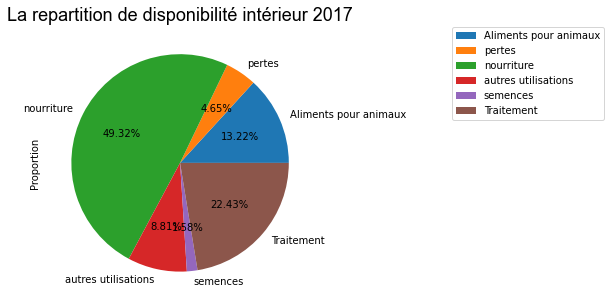

In [64]:
#La représentation de repartition de disponibilité intérieur en diagramme circulaire
#Créer le data frame pour le diagramme circulaire
data=pd.DataFrame({"Proportion":[prop_alim_animaux,prop_perdues,prop_nourriture,prop_autres_utilise,prop_semences,prop_traitement]},
                  index=["Aliments pour animaux","pertes","nourriture","autres utilisations","semences","Traitement"])
plot=data.plot.pie(y="Proportion",figsize=(10,5),autopct='%.2f%%')
plt.title("La repartition de disponibilité intérieur 2017", fontname='Arial',fontsize=18)
#Ajouter une légende
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0)
plt.show()

In [65]:
dispo_int=dispo_aliment.loc[:,['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].copy()
dispo_int

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement
0,0.0,0.0,53000000.0,0.0,0.0,0.0
1,0.0,0.0,39000000.0,2000000.0,0.0,0.0
2,0.0,0.0,2000000.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,82000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...
15411,0.0,0.0,3000000.0,0.0,0.0,0.0
15412,0.0,0.0,2000000.0,0.0,0.0,0.0
15413,0.0,0.0,0.0,0.0,0.0,0.0
15414,0.0,0.0,0.0,0.0,0.0,0.0


### Les questions de Mélanie, une étude un peu plus fine pour chacun des pays 

#### Question 1 : Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [66]:
#Fusionner les data frames de la population en 2017 et la sous nutrition 2017
pop_sn_2017=pd.merge(population_2017,ss_nut_2017, on="Zone", how="left")
pop_sn_2017

,Zone,population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
231,Venezuela (République bolivarienne du),29402484.0,8000000.0
232,Viet Nam,94600648.0,6500000.0
233,Yémen,27834819.0,0.0
234,Zambie,16853599.0,0.0


In [67]:
#Créer les nouvelles colonnes : proportion de personnes sous alimentés
pop_sn_2017["prop_pers_sous_aliment%"]=round((pop_sn["sous_nutrition"]*100/pop_sn["population"]),2)

In [68]:
#Vérifier le noveau data frame
pop_sn_2017.head()

,Zone,population,sous_nutrition,prop_pers_sous_aliment%
0,Afghanistan,36296113.0,10500000.0,28.93
1,Afrique du Sud,57009756.0,3100000.0,5.44
2,Albanie,2884169.0,100000.0,3.47
3,Algérie,41389189.0,1300000.0,3.14
4,Allemagne,82658409.0,0.0,0.00


In [69]:
pop_sn_2017.groupby("Zone")["prop_pers_sous_aliment%"].sum().reset_index()

,Zone,prop_pers_sous_aliment%
0,Afghanistan,28.93
1,Afrique du Sud,5.44
2,Albanie,3.47
3,Algérie,3.14
4,Allemagne,0.00
...,...,...
231,Îles Salomon,0.00
232,Îles Turques-et-Caïques,0.00
233,Îles Vierges américaines,0.00
234,Îles Vierges britanniques,0.00


In [70]:
#Faire un classement de la proportion par ordre décroissant et afficher les 10 premiers résultats
tableau=pop_sn_2017.sort_values(by='prop_pers_sous_aliment%',ascending=False).head(10)
tableau

,Zone,population,sous_nutrition,prop_pers_sous_aliment%
87,Haïti,10982366.0,5300000.0,48.26
181,République populaire démocratique de Corée,25429825.0,12000000.0,47.19
128,Madagascar,25570512.0,10500000.0,41.06
122,Libéria,4702226.0,1800000.0,38.28
119,Lesotho,2091534.0,800000.0,38.25
216,Tchad,15016753.0,5700000.0,37.96
186,Rwanda,11980961.0,4200000.0,35.06
145,Mozambique,28649018.0,9400000.0,32.81
219,Timor-Leste,1243258.0,400000.0,32.17
0,Afghanistan,36296113.0,10500000.0,28.93


In [71]:
#Afficher le résultat
print(f'Le pays pour lesquels la proportion de personnes sous_alimentées est la plus forte en 2017 est Haïti, {48.26}%')

Le pays pour lesquels la proportion de personnes sous_alimentées est la plus forte en 2017 est Haïti, 48.26%


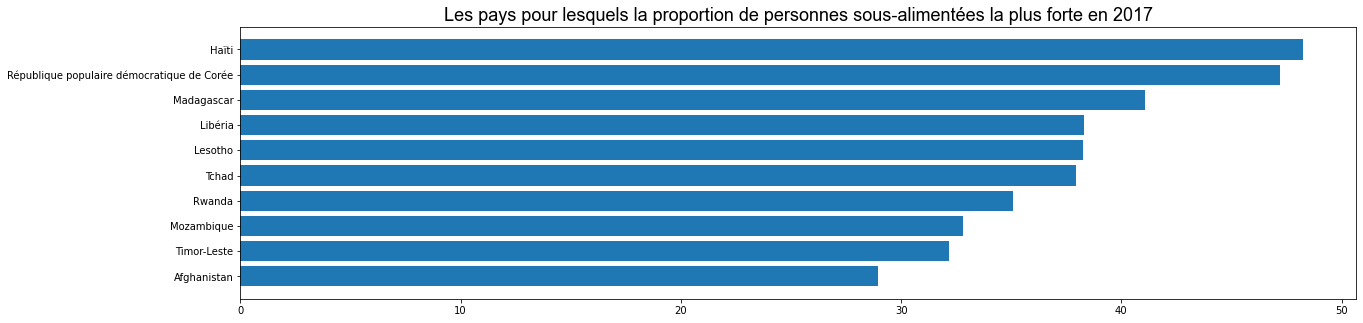

In [72]:
#Illustre les résultat avec un diagramme à barres 
top10_pop_sn_2017=tableau.sort_values(by='prop_pers_sous_aliment%',ascending=True)
plt.figure(figsize=(20,5))
x=top10_pop_sn_2017["Zone"]
y=top10_pop_sn_2017["prop_pers_sous_aliment%"]
plt.barh(x,y)
plt.title('Les pays pour lesquels la proportion de personnes sous-alimentées la plus forte en 2017',fontname='Arial',fontsize=18)
plt.show()

#### Question 2 : Les pays qui ont le plus bénéficié d’aide depuis 2013


In [73]:
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [74]:
#Vérifier les données importées
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [75]:
aide_alimentaire.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [76]:
aide_alimentaire.isna().sum()

Pays bénéficiaire    0
Année                0
Produit              0
Valeur               0
dtype: int64

In [77]:
#Remplacer les valeurs NaN avec 0
aide_alimentaire.fillna(0,inplace=True)

In [78]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [79]:
aide_alimentaire.describe(include="all")

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [80]:
aide_alimentaire["Pays bénéficiaire"].value_counts()

Algérie                            39
Yémen                              38
République arabe syrienne          38
Éthiopie                           33
Nicaragua                          33
                                   ..
Angola                              4
Zambie                              4
Comores                             2
Égypte                              2
Bolivie (État plurinational de)     2
Name: Pays bénéficiaire, Length: 76, dtype: int64

In [81]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [82]:
population["Année"].astype(object)

0       2013
1       2014
2       2015
3       2016
4       2017
        ... 
1411    2014
1412    2015
1413    2016
1414    2017
1415    2018
Name: Année, Length: 1416, dtype: object

In [83]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        1416 non-null   object 
 1   Année       1416 non-null   object 
 2   population  1416 non-null   float64
dtypes: float64(1), object(2)
memory usage: 33.3+ KB


In [84]:
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [85]:
#Changer le type de donées
aide_alimentaire["Année"]=aide_alimentaire["Année"].astype(int)

In [86]:
#Changer le type de donées
population["Année"]=population["Année"].astype(int)

In [87]:
#Renommer la colonne Pays bénéficiare au Zone
aide_alimentaire.rename(columns={"Pays bénéficiaire":"Zone"},inplace=True)

In [88]:
#Renommer la colonne Valeur au aide tonnes
aide_alimentaire.rename(columns={"Valeur":"aide_tonnes"},inplace=True)

In [89]:
aide_alimentaire.head()

,Zone,Année,Produit,aide_tonnes
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [90]:
#Appliquer la fonction d'aggrégation
aide=aide_alimentaire[["Zone","aide_tonnes"]].groupby("Zone").sum()
#La quantité d'aide alimentaire a été donné en tonnes
aide.sort_values(by='aide_tonnes',ascending=False).head(10)

,aide_tonnes
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


#### Question 3 : Les pays ayant le plus/le moins de disponibilité par habitant 


In [91]:
#Vérification des données
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [92]:
dispo_alimentaire.tail()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15604,Îles Salomon,"Épices, Autres",vegetale,0.0,0.0,4.0,0.48,0.21,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
#Covertir les colonnes de Kg aux Tonnes
colonnes_kg_totonnes = ['Aliments pour animaux', 'Disponibilité intérieure', 'Exportations - Quantité',
                        'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
                        'Semences', 'Traitement', 'Variation de stock', 'Autres Utilisations']

for elt in colonnes_kg_totonnes:
    dispo_alimentaire[elt] /= 1000

In [94]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [95]:
#Fusionner les data frame population et disponibilité" alimentaire
dispo_aliment_merge= pd.merge(population,dispo_alimentaire, on="Zone", how='left')
dispo_aliment_merge

,Zone,Année,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2013,32269589.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,2013,32269589.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,2013,32269589.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,32269589.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2013,32269589.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92875,Zimbabwe,2018,14438802.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000.0,0.0,6000.0,37000.0,0.0,32000.0,0.0,0.0,0.0
92876,Zimbabwe,2018,14438802.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000.0,0.0,6000.0,70000.0,0.0,64000.0,0.0,0.0,0.0
92877,Zimbabwe,2018,14438802.0,"Viande, Autre",animale,0.0,1000.0,7.0,2.29,0.21,1.12,34000.0,3000.0,1000.0,32000.0,0.0,36000.0,0.0,0.0,0.0
92878,Zimbabwe,2018,14438802.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000.0,0.0,2000.0,4000.0,0.0,2000.0,0.0,0.0,0.0


In [96]:
#Calculer disponibilité alimentaire par un habitant
dispo_aliment_merge["dispo_aliment_hab (Kcal/personne/jour)"]=round(((dispo_aliment_merge["Disponibilité intérieure"]*dispo_aliment_merge['Disponibilité alimentaire (Kcal/personne/jour)'])/dispo_aliment_merge["population"]),2)

In [97]:
#Filtrer les pays selon les disponibilités intérieurs
pays_dispo_aliment=dispo_aliment_merge.groupby("Zone")["Disponibilité alimentaire (Kcal/personne/jour)"].sum().reset_index()
pays_dispo_aliment


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,12522.0
1,Afrique du Sud,18120.0
2,Albanie,19128.0
3,Algérie,19758.0
4,Allemagne,21018.0
...,...,...
231,Îles Salomon,14298.0
232,Îles Turques-et-Caïques,0.0
233,Îles Vierges américaines,0.0
234,Îles Vierges britanniques,0.0


In [98]:
#Classer la proportion de disponibilité intérieur par ordre décroissant et afficher les 10 premiers résultats
tableau=pays_dispo_aliment.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)",ascending=False).reset_index()
tableau

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,15,Autriche,22620.0
1,21,Belgique,22422.0
2,207,Turquie,22248.0
3,221,États-Unis d'Amérique,22092.0
4,90,Israël,21660.0
...,...,...,...
231,119,Mayotte,0.0
232,198,Tchéquie,0.0
233,116,Martinique,0.0
234,105,Liechtenstein,0.0


In [99]:
print(f'Le pays ayant le plus de disponibilité par habitant est Autriche, {22620} Kcal/personne/jour')

Le pays ayant le plus de disponibilité par habitant est Autriche, 22620 Kcal/personne/jour


In [100]:
tableau.iloc[170:180,:]

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
170,215,Zambie,11544.0
171,159,République centrafricaine,11274.0
172,169,Saint-Barthélemy,0.0
173,24,Bhoutan,0.0
174,26,"Bonaire, Saint-Eustache et Saba",0.0
175,33,Burundi,0.0
176,47,Comores,0.0
177,52,Curaçao,0.0
178,68,Gibraltar,0.0
179,13,Aruba,0.0


In [101]:
#Filtrer les pays ayant le plus et le moins de disponibilité par habitant
tableau.loc[tableau['Disponibilité alimentaire (Kcal/personne/jour)']>0,:]

,index,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,15,Autriche,22620.0
1,21,Belgique,22422.0
2,207,Turquie,22248.0
3,221,États-Unis d'Amérique,22092.0
4,90,Israël,21660.0
...,...,...,...
167,81,Haïti,12534.0
168,0,Afghanistan,12522.0
169,109,Madagascar,12336.0
170,215,Zambie,11544.0


In [102]:
#Afficher le résultat
print(f'Le pays ayant le moins de disponibilité par habitant est République centrafricaine, 11274 Kcal/personne/jour')

Le pays ayant le moins de disponibilité par habitant est République centrafricaine, 11274 Kcal/personne/jour


#### Question 4 : Toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.

#### L’utilisation des céréales, notamment la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.

In [103]:
#Vérifier les données
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [104]:
#Afficher une liste de produit
dispo_alimentaire['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [105]:
#Appliquer la fonction d'aggrégation les produits selon les origines
df=dispo_alimentaire.groupby(['Origine','Produit']).agg({
    'Aliments pour animaux':'sum',
    'Nourriture':'sum'
}).reset_index()
df

,Origine,Produit,Aliments pour animaux,Nourriture
0,animale,Abats Comestible,1009000.0,15669000.0
1,animale,Animaux Aquatiques Autre,0.0,1249000.0
2,animale,"Beurre, Ghee",6000.0,9718000.0
3,animale,Cephalopodes,39000.0,3532000.0
4,animale,Crustacés,277000.0,12503000.0
...,...,...,...,...
93,vegetale,Sésame,3000.0,1436000.0
94,vegetale,Thé,0.0,5910000.0
95,vegetale,Tomates,1870000.0,144080000.0
96,vegetale,Vin,0.0,22985000.0


In [106]:
#Creér une liste ne contient que des céréales et produits
liste_cereales = ["Blé et produits", "Riz et produits", "Orge et produits", "Maïs et produits", "Seigle et produits",
                  "Avoine", "Millet et produits", "Sorgho et produits", "Céréales, Autres"]

In [107]:
#Création d'une table ne contenant que les informations des céréales et produits
cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste_cereales),:] 
cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,Afrique du Sud,Avoine,vegetale,8000.0,0.0,5.0,0.75,0.09,0.16,49000.0,4000.0,25000.0,40000.0,1000.0,28000.0,1000.0,0.0,0.0
81,Afrique du Sud,"Céréales, Autres",vegetale,8000.0,0.0,1.0,0.07,0.00,0.02,12000.0,10000.0,3000.0,4000.0,0.0,19000.0,0.0,0.0,0.0
162,Albanie,Avoine,vegetale,25000.0,0.0,1.0,0.13,0.01,0.03,28000.0,0.0,1000.0,0.0,1000.0,27000.0,1000.0,0.0,0.0
176,Albanie,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.08,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15347,États-Unis d'Amérique,Avoine,vegetale,1430000.0,0.0,19.0,3.95,0.31,0.79,2797000.0,102000.0,1851000.0,1265000.0,0.0,1016000.0,103000.0,0.0,32000.0
15361,États-Unis d'Amérique,"Céréales, Autres",vegetale,77000.0,0.0,5.0,0.62,0.02,0.15,271000.0,91000.0,281000.0,200000.0,0.0,81000.0,3000.0,0.0,0.0
15441,Éthiopie,Avoine,vegetale,0.0,0.0,4.0,0.61,0.07,0.19,60000.0,0.0,1000.0,57000.0,0.0,60000.0,3000.0,0.0,0.0
15454,Éthiopie,"Céréales, Autres",vegetale,0.0,469000.0,254.0,26.52,0.77,6.97,3274000.0,0.0,2000.0,2495000.0,234000.0,4672000.0,76000.0,0.0,-1400000.0


In [108]:
#Calculer la proportion de céréales et produits utilisé pour l'alimentation animale
prop_aliment_animale= round((cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()),2)
prop_aliment_animale

69.34

In [109]:
#Calculer la proportion de céréales et produits utilisé pour l'alimentation animale
prop_aliment_humaine= round((cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()),2)
prop_aliment_humaine

18.13

In [110]:
#Afficher le résultat
print("Proportion d'alimentation animale :", "{:.2f}".format(cereales['Aliments pour animaux'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")
print("Proportion d'alimentation humaine :", "{:.2f}".format(cereales['Nourriture'].sum()*100/cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 69.34 %
Proportion d'alimentation humaine : 18.13 %


#### L' utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition. De mémoire ça concernait l’exportation par rapport à la production... Peux-tu jeter un coup d’œil et nous faire un retour ?

In [111]:
#Fusionner les data frames population en 2017 et sous nutrition en 2017
pop_sous_nutrition = pd.merge(population.loc[population['Année'] == 2017,["Zone", "population"]],
                               sous_nutrition.loc[sous_nutrition['Année'] == '2017',["Zone", "sous_nutrition"]],
                               on='Zone')

In [112]:
pop_sous_nutrition

,Zone,population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0
...,...,...,...
198,Venezuela (République bolivarienne du),29402484.0,8000000.0
199,Viet Nam,94600648.0,6500000.0
200,Yémen,27834819.0,0.0
201,Zambie,16853599.0,0.0


In [113]:
pop_sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            203 non-null    object 
 1   population      203 non-null    float64
 2   sous_nutrition  203 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.3+ KB


In [114]:
#Filtrer les données de Thaïland avec une condition sur le ligne
thai = pop_sous_nutrition.loc[pop_sous_nutrition['Zone'] == 'Thaïlande',:].reset_index()
thai

,index,Zone,population,sous_nutrition
0,185,Thaïlande,69209810.0,6200000.0


In [115]:
#Calculer la proportion de population sous alimenté
prop_sous_nutrition= round((thai['sous_nutrition'].iloc[0]*100/thai['population'].iloc[0]),2)
prop_sous_nutrition

8.96

In [116]:
#Affichier le résultat
print('Proportion en sous nutrition en Thaïlande :', "{:.2f}".format(thai['sous_nutrition'].iloc[0]*100/thai['population'].iloc[0]), "%")

Proportion en sous nutrition en Thaïlande : 8.96 %


In [117]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


In [118]:
dispo_alimentaire.loc[dispo_alimentaire["Zone"]=="Thaïlande",:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000.0,5000.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000.0,6000.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000.0,0.0,0.00,0.00,0.00,358000.0,110000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000.0,7000.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000.0,1449000.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,Thaïlande,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,3.92,871000.0,22000.0,1000.0,871000.0,0.0,891000.0,0.0,0.0,0.0
13850,Thaïlande,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,4.49,945000.0,536000.0,11000.0,917000.0,28000.0,1470000.0,0.0,0.0,0.0
13851,Thaïlande,"Viande, Autre",animale,0.0,0.0,0.0,0.03,0.01,0.02,-92000.0,96000.0,4000.0,2000.0,0.0,0.0,0.0,0.0,0.0
13852,Thaïlande,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,0.00,8000.0,8000.0,16000.0,8000.0,0.0,0.0,0.0,0.0,0.0


In [119]:
#Filtrer le manioc pour Thaïlande
df=dispo_alimentaire.loc[dispo_alimentaire["Produit"]=="Manioc",:]
df

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
110,Afrique du Sud,Manioc,vegetale,0.0,57000.0,0.0,0.00,0.00,0.00,57000.0,2000.0,58000.0,0.0,0.0,0.0,0.0,0.0,1000.0
203,Albanie,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,Algérie,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
390,Allemagne,Manioc,vegetale,1000.0,26000.0,0.0,0.00,0.00,0.00,27000.0,14000.0,41000.0,0.0,0.0,0.0,0.0,0.0,0.0
475,Angola,Manioc,vegetale,8880000.0,0.0,560.0,197.90,0.60,4.72,16412000.0,0.0,0.0,4249000.0,3282000.0,16412000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,Égypte,Manioc,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,-1000.0,3000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
15201,Émirats arabes unis,Manioc,vegetale,0.0,7000.0,3.0,1.47,0.01,0.03,20000.0,1000.0,21000.0,14000.0,0.0,0.0,0.0,0.0,0.0
15294,Équateur,Manioc,vegetale,0.0,1000.0,6.0,2.53,0.02,0.05,44000.0,8000.0,6000.0,40000.0,2000.0,46000.0,0.0,0.0,0.0
15390,États-Unis d'Amérique,Manioc,vegetale,288000.0,245000.0,0.0,0.14,0.00,0.00,579000.0,9000.0,588000.0,46000.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#Filtrer le Zone Thaïlande
data=df.loc[df["Zone"]=="Thaïlande"].reset_index()
data

,index,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [121]:
#Disponibilité alimentaire = Production + importations - exportation + variation des stocks
thai_dispo_int = data["Production"].iloc[0] + data["Importations - Quantité"].iloc[0] - data["Exportations - Quantité"].iloc[0] - data["Variation de stock"].iloc[0] 
thai_dispo_int

6264000.0

In [122]:
#Le total de disponibilité intérieur par jour
thai_dispo_int_total= data["Disponibilité intérieure"]*data["Disponibilité alimentaire (Kcal/personne/jour)"]
thai_dispo_int_total

0    250560000.0
dtype: float64

In [123]:
#Calculer la proportion de population de Thaïlande qui pourrait être nourri
thai_dispo_int_prop= thai_dispo_int_total*100/2600/thai["population"]
thai_dispo_int_prop

0    0.139242
dtype: float64